In [6]:
import pandas as pd

from sklearn.cluster import KMeans

import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [2]:
def import_and_process(file_path):
    le = LabelEncoder()
    df = pd.read_csv(file_path)
    df.drop(['stockcode_letters', 'InvoiceDate', 'Description'], axis = 1, inplace = True)
    df['Country'] = le.fit_transform(df['Country'])
    return df
df = import_and_process('Data/cleaned_sales_data')

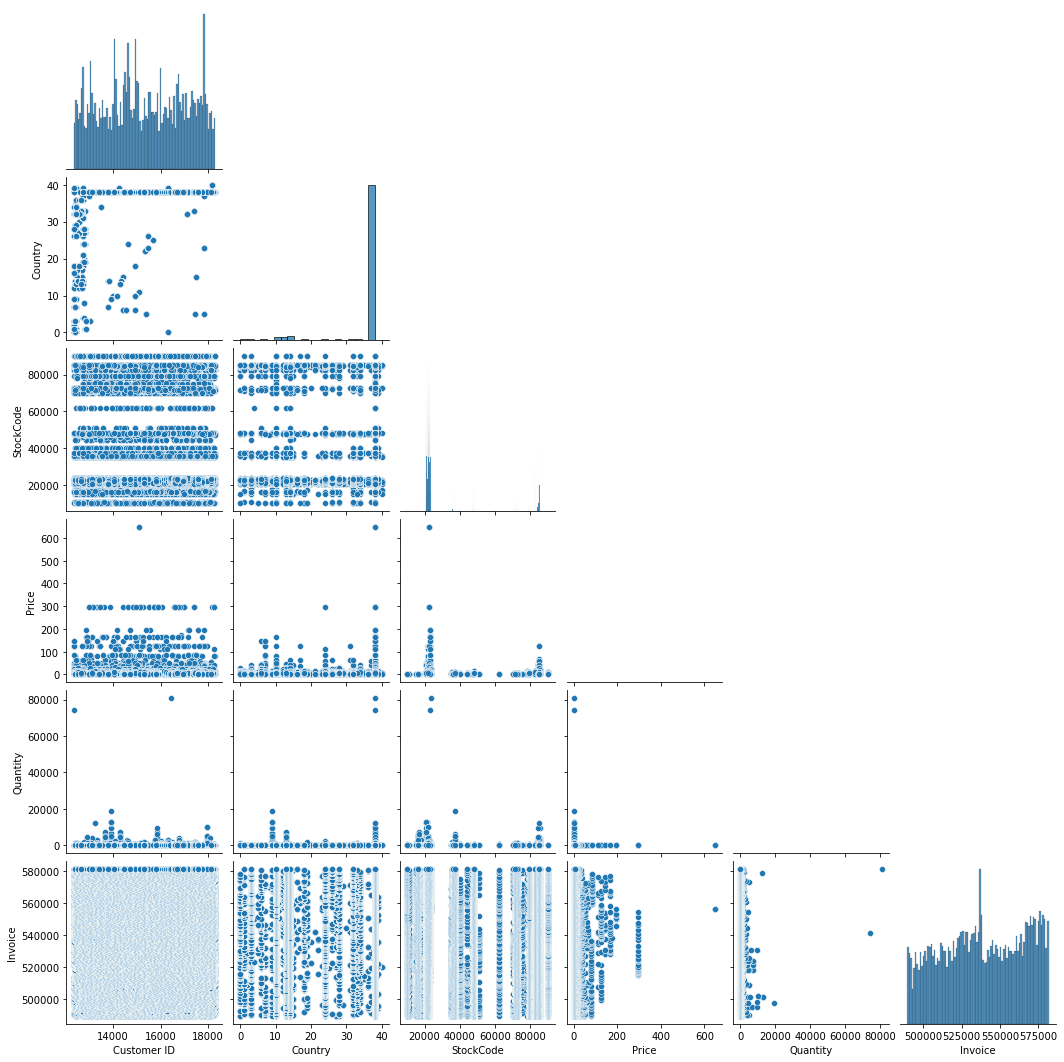

In [3]:
sns.pairplot(df,
             x_vars = ['Customer ID', 'Country', 'StockCode', 'Price', 'Quantity', 'Invoice'],
             y_vars = ['Customer ID', 'Country', 'StockCode', 'Price', 'Quantity', 'Invoice'],
             corner = True);

## Clustering with KMeans

In [8]:
X = StandardScaler().fit_transform(df)
x_df = pd.DataFrame(X)
x_df

,0,1,2,3,4,5
0,-1.850264,3.208319,-0.009296,0.914582,-1.322395,0.307754
1,-1.850264,-0.348103,0.228097,-0.189406,-1.322395,0.307754
2,-1.850264,-0.393767,0.069835,-0.382888,-1.322395,0.307754
3,-1.850264,-0.346805,0.069835,-0.291838,-1.322395,0.307754
4,-1.850264,-0.357699,0.069835,-0.382888,-1.322395,0.307754
...,...,...,...,...,...,...
714043,1.628979,-0.315816,-0.009296,-0.473939,-1.561227,-3.141397
714044,1.628979,-0.299673,-0.048861,-0.189406,-1.561227,-3.141397
714045,1.628979,-0.279635,-0.062050,0.277228,-1.561227,-3.141397
714046,1.628979,-0.279579,-0.062050,0.277228,-1.561227,-3.141397


In [9]:
model = KMeans(n_clusters= 5)
model.fit(X)

KMeans(n_clusters=5)

In [11]:
df['cluster'] = model.labels_

In [12]:
silhouette_score(X, model.labels_)

0.31845433966552295

In [13]:
df

,Invoice,StockCode,Quantity,Price,Customer ID,Country,cluster
0,489434,85048,12,6.95,13085.0,38,3
1,489434,22041,48,2.10,13085.0,38,2
2,489434,21232,24,1.25,13085.0,38,2
3,489434,22064,24,1.65,13085.0,38,2
4,489434,21871,24,1.25,13085.0,38,2
...,...,...,...,...,...,...,...
714043,581587,22613,12,0.85,12680.0,13,0
714044,581587,22899,6,2.10,12680.0,13,0
714045,581587,23254,4,4.15,12680.0,13,0
714046,581587,23255,4,4.15,12680.0,13,0
